In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ORIGINAL_FPS = 30
MANUAL_FPSS = ['2', '3', '5', '6', '10', '15']
USE_MANUAL_FPSS = True
THRESHOLD = 0.75

In [3]:
accuracy_result_dict_paths = [
	# '../assets/result/accuracy_movement/Video1_Accuracy_Result.json',
    # '../assets/result/accuracy_movement/Video2_Accuracy_Result.json',
    # '../assets/result/accuracy_movement/Video3_Accuracy_Result.json',
    '../assets/result/accuracy_movement/Video4_Accuracy_Result.json',
]

In [4]:
movement_result_dict_paths = [
	# '../assets/result/accuracy_movement/Video1_Movement_Result.json',
    # '../assets/result/accuracy_movement/Video2_Movement_Result.json',
    # '../assets/result/accuracy_movement/Video3_Movement_Result.json',
    '../assets/result/accuracy_movement/Video4_Movement_Result.json',
]

In [5]:
def round_floats_to_sigfigs(input_list, sigfigs):
	return [round(number, sigfigs) for number in input_list]

In [6]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
		
	return data

In [7]:
def extract_fpss(metric_list, data_type='metric'):
	return list(metric_list[list(metric_list.keys())[0]][0][data_type].keys())

In [8]:
def extract_metric_list(metric_list, fpss, feature='F1', data_type='metric'):
	result_column = {}
		
	for fps in fpss:
		if data_type == 'metric':
			result_column[fps] = [clip_metric[data_type][fps][feature] for clip_metric in metric_list]
		elif data_type == 'movement':
			result_column[fps] = [clip_metric[data_type][fps] for clip_metric in metric_list]
		
	return result_column

In [9]:
def cumulative_sum_list(input_list):
	result = []
	total = 0
	for item in input_list:
		total += item
		result.append(total)
	return result

def extract_metric_time(metric_list):
	frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
	time_list = cumulative_sum_list(frame_number_list)
	time_list = list(np.array(time_list) - time_list[0])
	scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

	return round_floats_to_sigfigs(scaled_time_list, 0)

In [10]:
colors = [
	'#e6194B',
	'#f58231',
	'#9A6324',
	'#911eb4',
	'#3cb44b',
	'#f032e6',
	'#4363d8',
]

In [11]:
def find_max_index(string_list):
	# Convert each element to integer
	int_list = [int(element) for element in string_list]
		
	# Find index of maximum integer value
	max_index, max_value = max(enumerate(int_list), key=lambda x: x[1])
		
	return max_value

In [12]:
def extract_cheapest_fps(accuracy_dict, fpss, threshold=0.75, use_MANUAL_FPSS=False):
	if use_MANUAL_FPSS:
		fpss = MANUAL_FPSS
	else:
		fpss = fpss
				
	max_fps = find_max_index(fpss)
	
	cheapest_fpss = []
	for i in range(len(accuracy_dict[fpss[0]])):
		curr_fps = max_fps
		for fps in fpss:
			if accuracy_dict[fps][i] >= threshold and int(fps) < int(curr_fps):
				curr_fps = fps
		
		cheapest_fpss.append(int(curr_fps))
	
	return cheapest_fpss

In [13]:
def duplicate_elements_accuracy(input_list):
	result = []
	for item in input_list:
		result.append(item)
		result.append(item)
	return result

In [14]:
def duplicate_elements_time(input_list):
	result = [0]
	for item in input_list:
		if item == input_list[-1]:
			result.append(item)
			break
		result.append(item)
		result.append(item)
	return result

def cumulative_sum_list(input_list):
	result = []
	total = 0
	for item in input_list:
		total += item
		result.append(total)
	return result

def extract_metric_time_horizontal(metric_list):
	frame_number_list = [clip_metric['frame_count'] for clip_metric in metric_list]
	time_list = cumulative_sum_list(frame_number_list)
	time_list = duplicate_elements_time(time_list)
	scaled_time_list = list(np.array(time_list) / ORIGINAL_FPS)

	return round_floats_to_sigfigs(scaled_time_list, 0)

In [15]:
def plot_one_line(xs, ys, x_label, y_label, title, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(9, 9))
	
	ax1.plot(xs, ys, color='black', label="Minimum Required FPS")

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [16]:
accuracy_at_fps = []

for result_dict_path in accuracy_result_dict_paths:
	result_dict = load_json(result_dict_path)
	fpss = extract_fpss(result_dict)

	for class_idx in list(result_dict.keys()):
		accuracy = extract_metric_list(result_dict[class_idx], fpss)
		time = extract_metric_time(result_dict[class_idx])

		for fps in MANUAL_FPSS:
			accuracy_at_fps.append(np.average(accuracy[fps]))


In [17]:
power_at_fps = []
power_at_all_fps = load_json('../assets/result/energy/Dict-Per-Real-Second-Throughput-960.json')

for fps in MANUAL_FPSS:
	power_at_fps.append(power_at_all_fps[str(fps)])

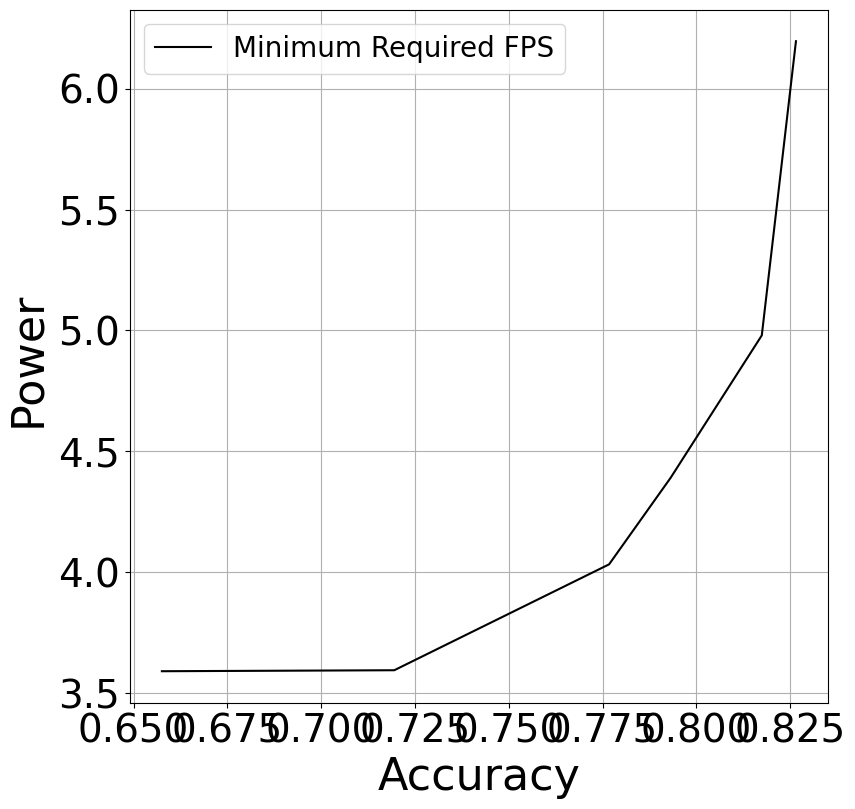

In [18]:
plot_one_line(accuracy_at_fps, power_at_fps, 'Accuracy', 'Power ', 'title')